In [243]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.decomposition import PCA

In [244]:
# Edit options (optional)
# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

## Characterizing data columns

* track_name    (discrete, nominal) 
* artist(s)_name    (discrete, nominal) 
* artist_count  (discrete, ratio) 
* released_year (discrete, ordinal) 
* released_month    (discrete, ordinal) 
* released_day  (discrete, ordinal) 
* in_spotify_playlists  (discrete, ratio) 
* in_spotify_charts (discrete, ratio) 
* streams   (discrete, ratio) 
* in_apple_playlists    (discrete, ratio)
* in_apple_charts   (discrete, ratio) 
* in_deezer_playlists   (discrete, ratio) 
* in_deezer_charts  (discrete, ratio)
* in_shazam_charts  (discrete, ratio) 
* bpm   (continuous, ratio) 
* key   (discrete, nominal) 
* mode  (discrete, nominal) 
* danceability_%    (continuous, ratio) 
* valence_% (continuous, ratio) 
* energy_%  (continuous, ratio) 
* acousticness_%    (continuous, ratio) 
* instrumentalness_%    (continuous, ratio) 
* liveness_%    (continuous, ratio) 
* speechiness_% (continuous, ratio) 

In [245]:
# == Functions ==

# - Plotting

def plot_correlation_heatmap(data: pd.DataFrame, columns: list):
    """
    Plot correlation heatmap of specific columns
    """
    correlation_matrix = data[columns].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidth=0.5)
    plt.title("Correlation Heatmap for selected attributes")
    plt.show()

def plot_distributions(data: pd.DataFrame):
    """
    Plot distributions of numeric data
    """
    sns.set_style("whitegrid", {"grid_linestyle": "--"})
    # For each column plot their distribution
    # I need a max column grid
    columns = data.columns
    num_plots = len(columns)
    num_rows = math.ceil(num_plots / 2)
    num_columns = 2

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 12))
    axes = axes.ravel()
    for i, column in enumerate(columns):
        sns.histplot(data[column], ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        plt.xlim(0)

    if num_plots % 2 != 0:
        axes.flat[-1].set_visible(False)
   
    plt.tight_layout()
    plt.show()

def plot_violin(data: pd.DataFrame, column: str):
    """
    Plot violin 
    """    
    plt.figure(figsize=(6, 6))
    sns.violinplot(y=column, data=data, orient="v")
    plt.title(f"Violin Plot of {column}")
    
    plt.show()

# - PCA Analysis

def plot_PCA_variance(numbers: list, ratios: list):
    """
    Plot variance ratio
    """
    plt.grid(True)
    plt.plot(numbers, ratios, marker="o")
    plt.xlabel("n_components")
    plt.ylabel("Explained Variance Ratio")
    plt.title("n_components vs. Explained Variance Ratio")
    # plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

def plot_PCA_directions(data_numeric, numbers):
    data_scaled = StandardScaler().fit_transform(data_numeric)

    n_plots = len(numbers)
    n_cols = min(n_plots, 2)
    n_rows = (n_plots + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 6))
    fig.subplots_adjust(hspace=0.7)

    component_colors = plt.cm.viridis(np.linspace(0, 1, max(numbers) + 1))

    for i, number in enumerate(numbers):
        row = i // n_cols
        col = i % n_cols

        pca = PCA(n_components=number)
        pca.fit_transform(data_scaled)
        principal_direction = pca.components_

        ax = axes[row, col]
        ax.set_title(f"Principal Directions for {number} Components")
        for j, direction in enumerate(principal_direction):
            color = component_colors[j]
            ax.quiver(0, 0, direction[0], direction[1], angles='xy', scale_units='xy', scale=1.0, color=color, label=f"Component {j + 1}")
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")

        ax.grid(linestyle='--', linewidth=0.5, alpha=0.6, color='gray')

    common_legend = fig.legend(handles=[plt.Line2D([0], [0], color=component_colors[i], label=f"Component {i + 1}") for i in range(max(numbers) + 1)], title="Components", loc='upper right', bbox_to_anchor=(1.2, 0.9))
    for handle in common_legend.legendHandles:
        handle.set_visible(True)

    for i in range(n_plots, n_rows * n_cols):
        fig.delaxes(axes.flatten()[i])

    plt.suptitle("PCA Components Directions", fontsize=16)
    plt.tight_layout()
    plt.show()


# ====

In [246]:
dataset_path = "dataset/dataset-spotify-2023.csv"
data = pd.read_csv(dataset_path, encoding="latin-1")

In [247]:

# Rename selected columns
columns = ["danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%",
"liveness_%", "speechiness_%"]
data = data.rename(columns={column: column.replace("_%", "") for column in columns})

In [248]:
# Print nan count of `key` (95), no other column has missing data
key_None_count = data["key"].isna().sum()
in_shazam_charts_None_count = data["in_shazam_charts"].isna().sum()

print("`key` None count: ", key_None_count)
print("`in_shazam_charts` None count: ", in_shazam_charts_None_count)

# Replace NaN values with Unspecified, it may be useful later on
data = data.replace(np.nan, "Unavailable")

`key` None count:  95
`in_shazam_charts` None count:  50


In [249]:

# Data is malformed, need to remove comma `,`
data["in_deezer_playlists"] = data["in_deezer_playlists"].replace(",", "", regex=True)
data["in_shazam_charts"] = data["in_deezer_playlists"].replace(",", "", regex=True)

# Convert columns to int64
# streams, in_deezer_playlists, in_shazam_charts
data["in_deezer_playlists"] = data["in_deezer_playlists"].astype(int)
data["in_shazam_charts"] = data["in_shazam_charts"].astype(int)

# Streams overflowed with int, so use np.int64 to fit the whole numbers
data["streams"] = data["streams"].astype(np.int64)

# Wee see that `streams` is very large compared to to other data, next larger is `in_spotify_playlists`
# Add extra column with log value of streams
# data["streams_log"] = np.log2(data["streams"])

In [250]:
# Problematic record 576 removed manually
# Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,,16,0,54,0,0,110,A,Major,53,75,69,7,0,17,3

# Print statistics, print them without the scientific notation
summary_statistics = data.describe().apply(lambda s: s.apply(lambda x: format(x, "g"))).transpose()
print("Statistics", summary_statistics)

# Print unique values of mode
# print(data["mode"].value_counts())
# print("Index of mistake in data:", data.index[data["mode"] == "53"].tolist())
latex_table = summary_statistics.applymap(lambda x: f"{x:.2f}" if isinstance(x, (float, int)) else str(x))
print("Latex Table:")
print(latex_table.to_latex())

Statistics                      count         mean          std   min          25%   
artist_count           952      1.55672     0.893331     1            1  \
released_year          952      2018.29      11.0114  1930         2020   
released_month         952      6.03887      3.56457     1            3   
released_day           952      13.9443      9.19722     1            6   
in_spotify_playlists   952      5202.57       7901.4    31        874.5   
in_spotify_charts      952      12.0221      19.5824     0            0   
streams                952  5.14137e+08  5.66857e+08  2762  1.41636e+08   
in_apple_playlists     952      67.8666      86.4706     0           13   
in_apple_charts        952      51.9632      50.6289     0            7   
in_deezer_playlists    952      385.536      1131.08     0           13   
in_deezer_charts       952      2.66912      6.03815     0            0   
in_shazam_charts       952      385.536      1131.08     0           13   
bpm           

In [251]:
# Select numeric columns
data_numeric = data.select_dtypes(exclude="object")
data_numeric.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   artist_count          952 non-null    int64
 1   released_year         952 non-null    int64
 2   released_month        952 non-null    int64
 3   released_day          952 non-null    int64
 4   in_spotify_playlists  952 non-null    int64
 5   in_spotify_charts     952 non-null    int64
 6   streams               952 non-null    int64
 7   in_apple_playlists    952 non-null    int64
 8   in_apple_charts       952 non-null    int64
 9   in_deezer_playlists   952 non-null    int32
 10  in_deezer_charts      952 non-null    int64
 11  in_shazam_charts      952 non-null    int32
 12  bpm                   952 non-null    int64
 13  danceability          952 non-null    int64
 14  valence               952 non-null    int64
 15  energy                952 non-null    int64
 16  acoustic

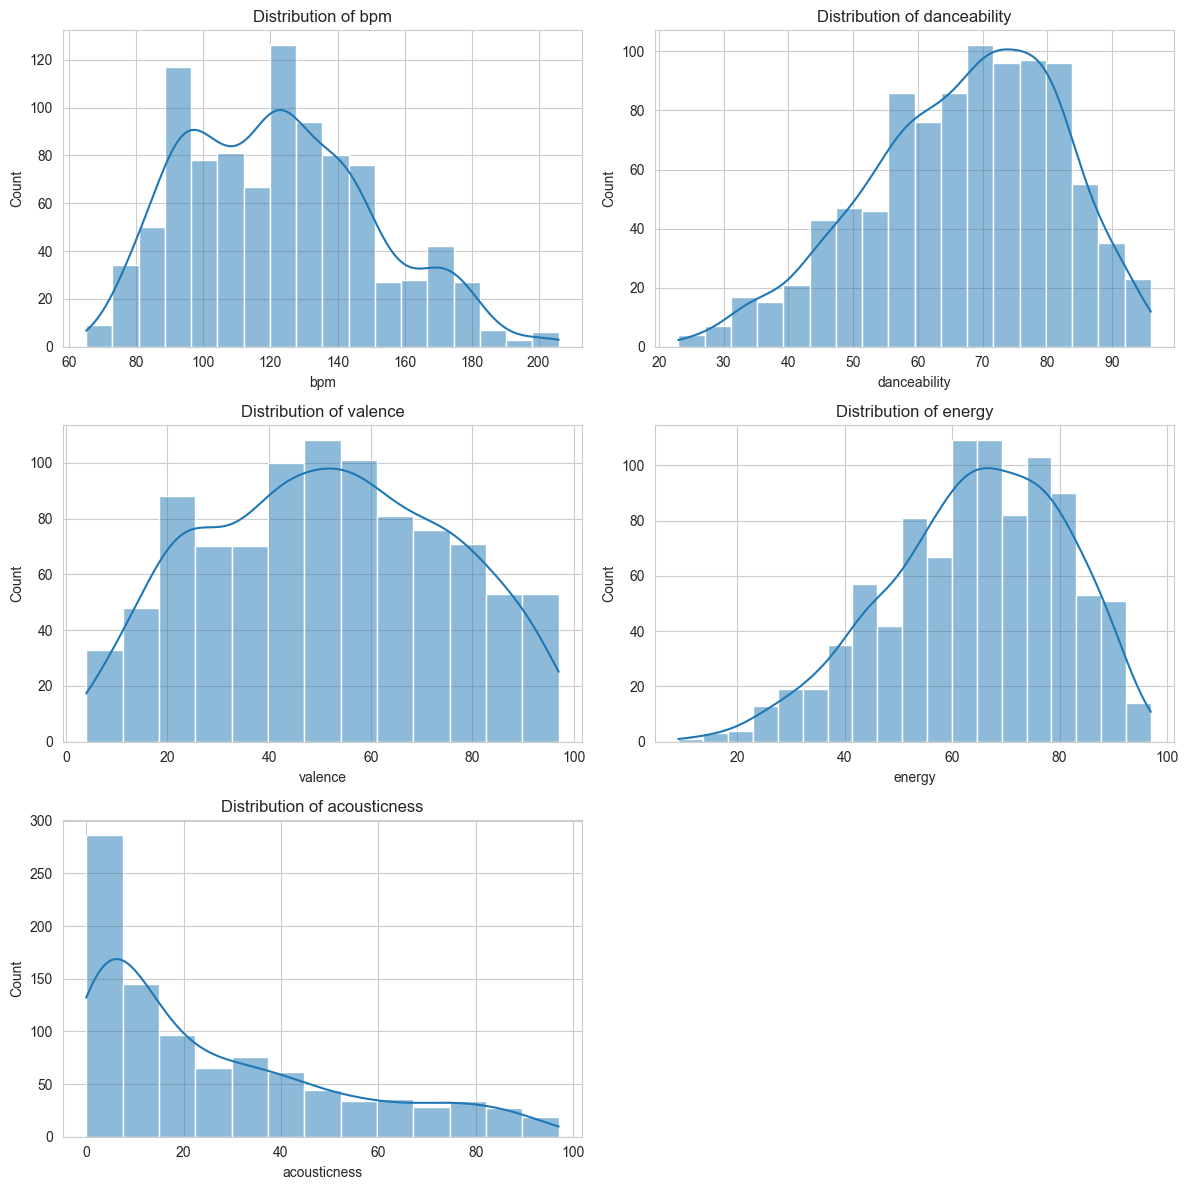

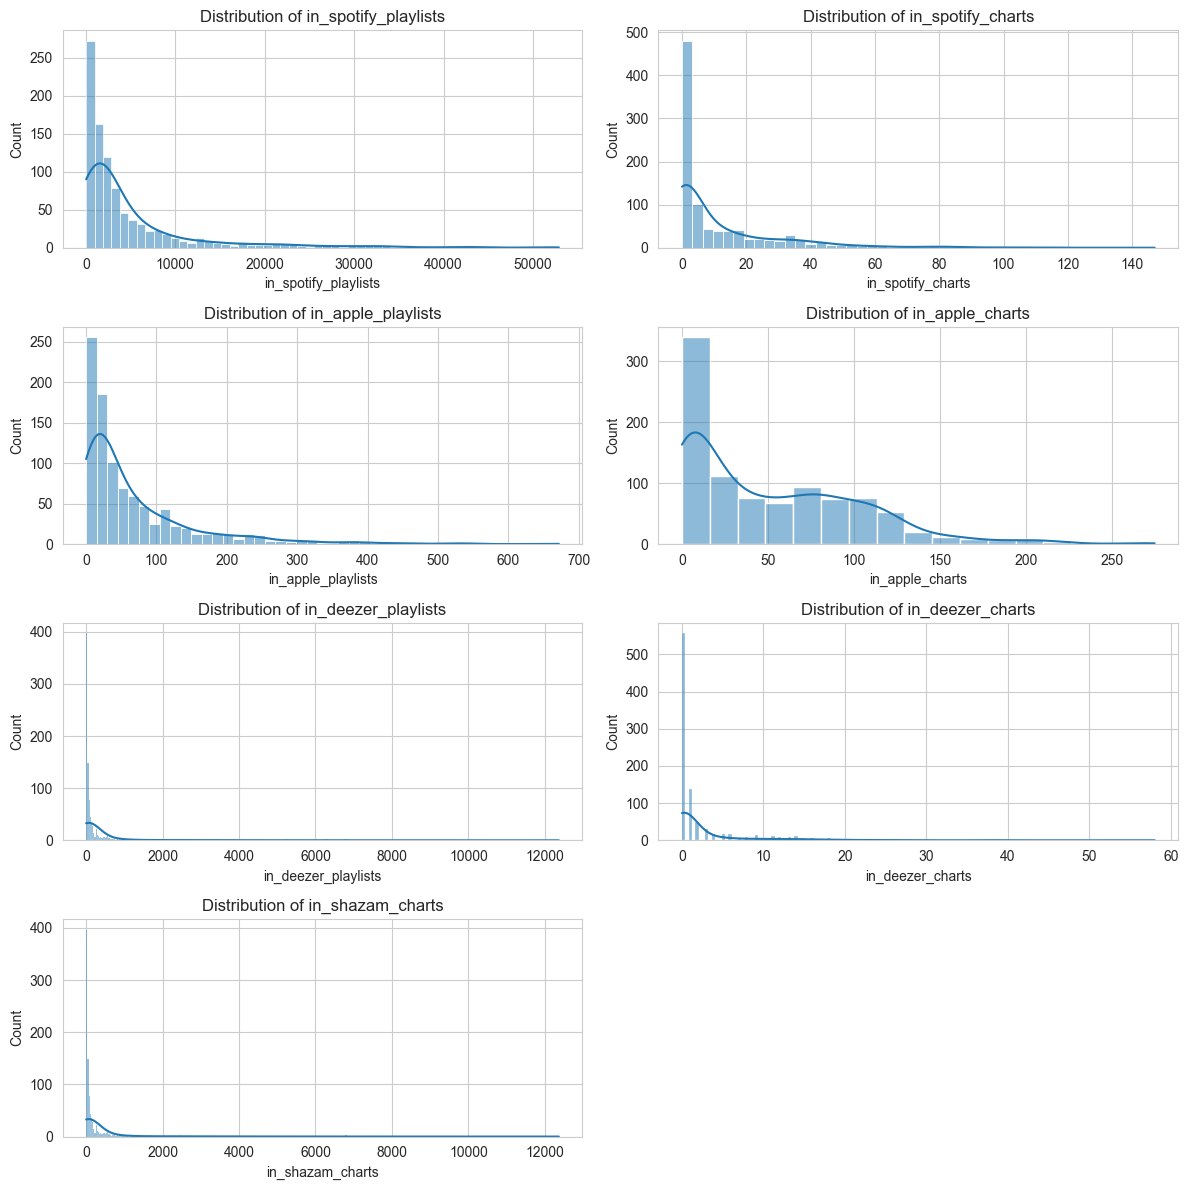

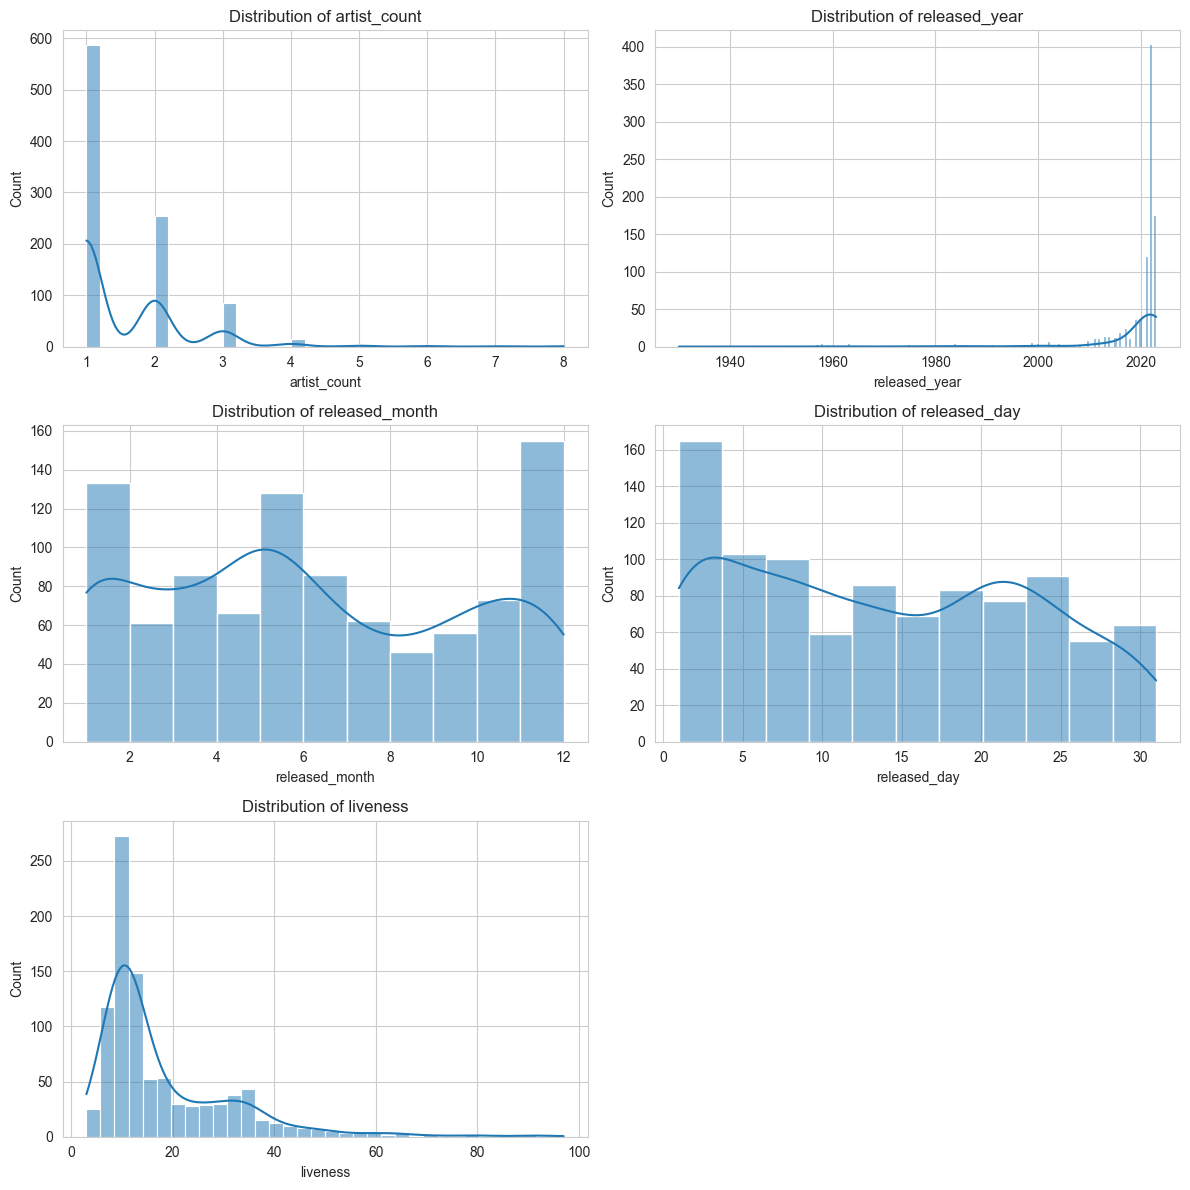

In [252]:
# Plot distribution of numeric datas
plot_distributions(data=data_numeric.iloc[:, 12:17])
plot_distributions(data=data_numeric.iloc[:, [4, 5, 7, 8, 9, 10, 11]])
plot_distributions(data=data_numeric.iloc[:, [0, 1, 2, 3, 18]])

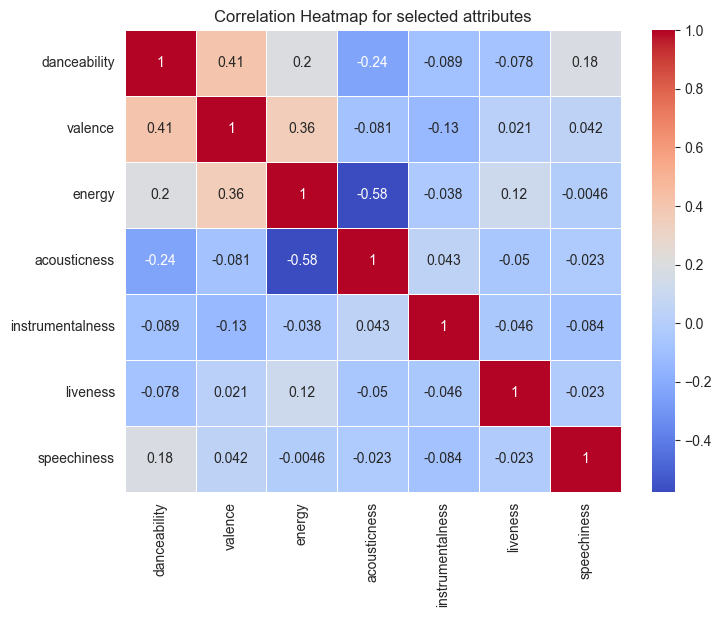

In [253]:
# Plot heatmap
plot_correlation_heatmap(data=data, columns = ["danceability", "valence", "energy", "acousticness", "instrumentalness",
"liveness", "speechiness"])

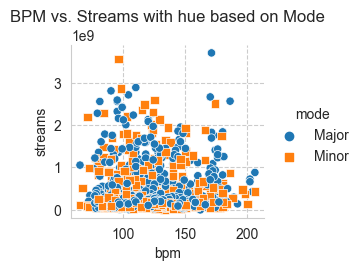

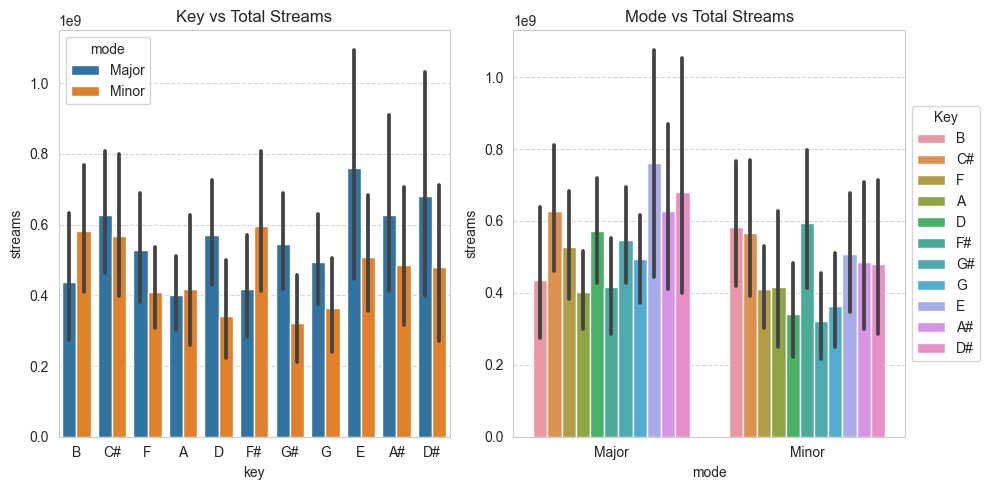

In [254]:
# Create a pair plot for BPM vs. Streams with hue based on Mode
sns.pairplot(data=data, x_vars=["bpm"], y_vars=["streams"], hue="mode", markers=["o", "s"])
plt.grid(True, linestyle="--")
plt.title("BPM vs. Streams with hue based on Mode")

sns.set_style("whitegrid") 
# Create a bar chart for Key vs. Streams
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.barplot(data=data[data['key'] != 'Unavailable'], x="key", y="streams", hue="mode")
plt.title("Key vs Total Streams")
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.8)

# Create a bar chart for Mode vs. Streams
plt.subplot(122)
sns.barplot(data=data[data['key'] != 'Unavailable'], x="mode", y="streams", hue="key")
plt.title("Mode vs Total Streams")
plt.legend(title="Key", loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the layout
plt.tight_layout()
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.8)

# Show the plot
plt.show()

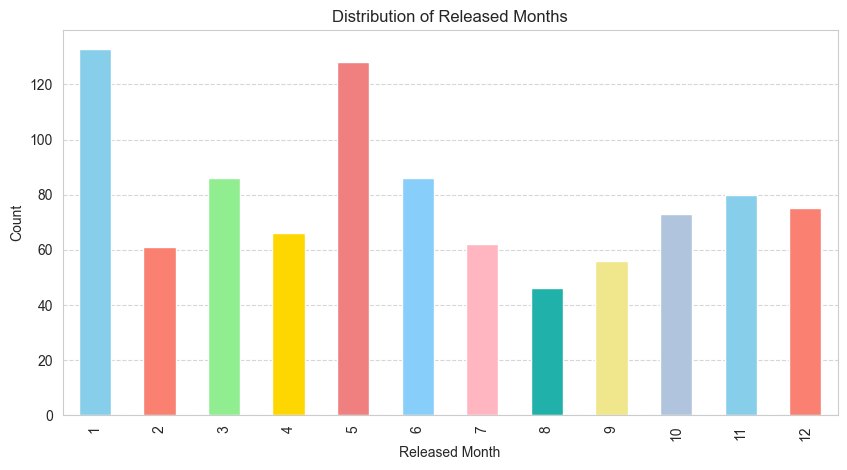

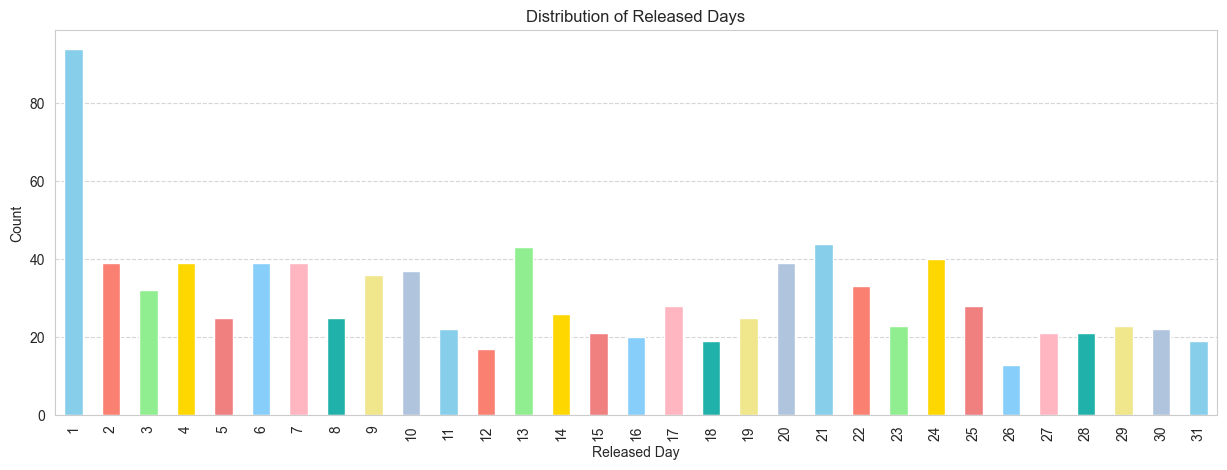

In [255]:
# Discrete variables - time

# Released year is not that useful
# Released Month
colors = ["skyblue", "salmon", "lightgreen", "gold", "lightcoral", "lightskyblue", "lightpink", "lightseagreen", "khaki", "lightsteelblue"]

# Released Month
plt.figure(figsize=(10, 5))
data["released_month"].value_counts().sort_index().plot(kind="bar", color=colors)
plt.xlabel("Released Month")
plt.ylabel("Count")
plt.title("Distribution of Released Months")
plt.gca().yaxis.grid(True, linestyle="--", alpha=0.8)
plt.gca().xaxis.grid(False)
plt.show()

# Released Day
plt.figure(figsize=(15, 5))
data["released_day"].value_counts().sort_index().plot(kind="bar", color=colors)
plt.xlabel("Released Day")
plt.ylabel("Count")
plt.title("Distribution of Released Days")
plt.gca().yaxis.grid(True, linestyle="--", alpha=0.8)
plt.gca().xaxis.grid(False)
plt.show()


Crosstabulation for month and mode:
mode            Major  Minor Prevalent Mode
released_month                             
1                  70     63          Major
2                  31     30          Major
3                  52     34          Major
4                  42     24          Major
5                  67     61          Major
6                  43     43          Major
7                  40     22          Major
8                  29     17          Major
9                  33     23          Major
10                 45     28          Major
11                 54     26          Major
12                 43     32          Major

Crosstabulation for month and key:
key              A  A#   B  C#   D  D#   E   F  F#   G  G#  Unavailable   
released_month                                                            
1               10  12   5  14  17   3   8  15  12  11  13           13  \
2                7   0   8  10   6   1   3   4   3   7   5            7   
3           

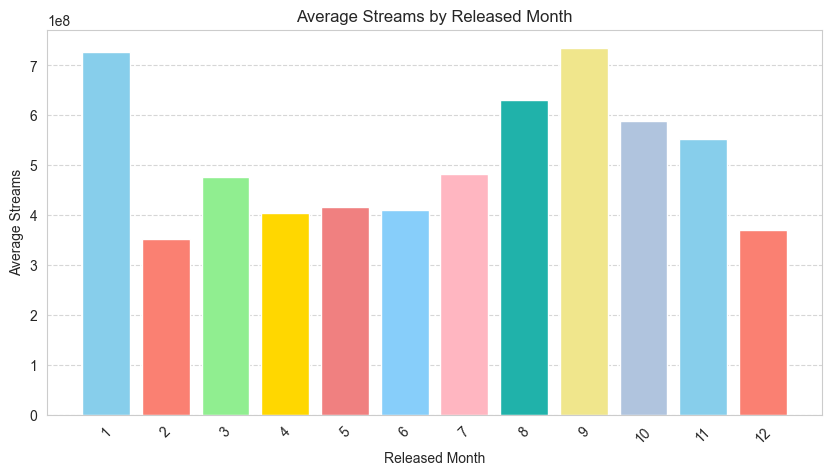

In [256]:
# Questions to answer:
# How is `month` related with the `mode` and `key`?
# Also how is `month` related to streams?

month_mode_crosstab = pd.crosstab(data["released_month"], data["mode"])

month_key_crosstab = pd.crosstab(data["released_month"], data["key"])

most_prevalent_mode = month_mode_crosstab.apply(lambda x: x.idxmax(), axis=1)

month_mode_crosstab["Prevalent Mode"] = most_prevalent_mode

most_prevalent_key = month_key_crosstab.apply(lambda x: x.idxmax(), axis=1)

month_key_crosstab["Prevalent Key"] = most_prevalent_key

print("Crosstabulation for month and mode:")
print(month_mode_crosstab)

print("\nCrosstabulation for month and key:")
print(month_key_crosstab)

average_streams_by_month = data.groupby("released_month")["streams"].mean()

plt.figure(figsize=(10, 5))
plt.bar(average_streams_by_month.index, average_streams_by_month.values, color=colors)
plt.xlabel("Released Month")
plt.ylabel("Average Streams")
plt.title("Average Streams by Released Month")

# Add grid lines
plt.gca().yaxis.grid(True, linestyle="--", alpha=0.8)
plt.gca().xaxis.grid(False)

# Rotate x-axis labels for better readability
plt.xticks(average_streams_by_month.index, rotation=45)
plt.show()

In [257]:
# More latex tables
print("Latex table")
print(month_mode_crosstab.to_latex())

print("\nLatex table:")
print(month_key_crosstab.to_latex())

Latex table
\begin{tabular}{lrrl}
\toprule
mode & Major & Minor & Prevalent Mode \\
released_month &  &  &  \\
\midrule
1 & 70 & 63 & Major \\
2 & 31 & 30 & Major \\
3 & 52 & 34 & Major \\
4 & 42 & 24 & Major \\
5 & 67 & 61 & Major \\
6 & 43 & 43 & Major \\
7 & 40 & 22 & Major \\
8 & 29 & 17 & Major \\
9 & 33 & 23 & Major \\
10 & 45 & 28 & Major \\
11 & 54 & 26 & Major \\
12 & 43 & 32 & Major \\
\bottomrule
\end{tabular}


Latex table:
\begin{tabular}{lrrrrrrrrrrrrl}
\toprule
key & A & A# & B & C# & D & D# & E & F & F# & G & G# & Unavailable & Prevalent Key \\
released_month &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
1 & 10 & 12 & 5 & 14 & 17 & 3 & 8 & 15 & 12 & 11 & 13 & 13 & D \\
2 & 7 & 0 & 8 & 10 & 6 & 1 & 3 & 4 & 3 & 7 & 5 & 7 & C# \\
3 & 6 & 2 & 7 & 11 & 10 & 3 & 4 & 11 & 8 & 9 & 5 & 10 & C# \\
4 & 6 & 7 & 4 & 9 & 4 & 1 & 4 & 3 & 9 & 9 & 7 & 3 & C# \\
5 & 11 & 10 & 18 & 15 & 3 & 8 & 9 & 11 & 9 & 10 & 14 & 10 & B \\
6 & 10 & 4 & 9 & 15 & 4 & 3 & 2 & 10 & 7 & 6 & 8 & 8 & C#

In [258]:
# One-hot encoding values
extended_data = pd.get_dummies(data, columns=["key", "mode"], prefix=["key", "mode"])

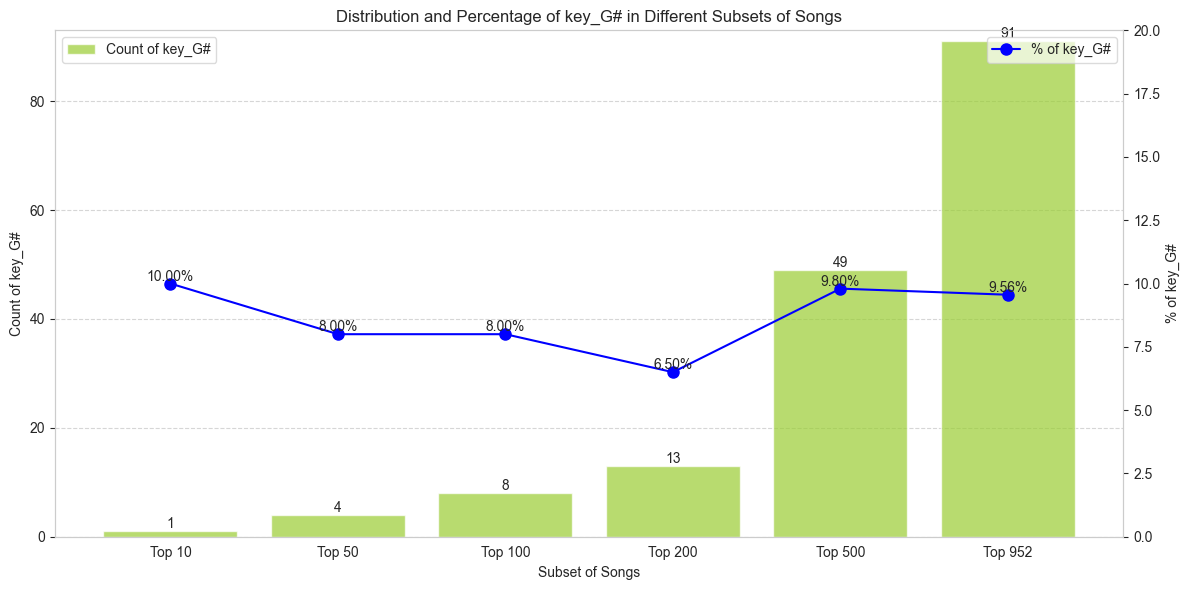

In [260]:
# More analysis, inspired by the previous work

key_counts = []
key_percentages = []

top_10_songs = extended_data.nlargest(10, "streams")
top_50_songs = extended_data.nlargest(50, "streams")
top_100_songs = extended_data.nlargest(100, "streams")
top_200_songs = extended_data.nlargest(200, "streams")
top_500_songs = extended_data.nlargest(500, "streams")
top_max_songs = extended_data.nlargest(data.shape[0], "streams")

dataframes = [top_10_songs, top_50_songs, top_100_songs, top_200_songs, top_500_songs, top_max_songs]

for df in dataframes:
    key_count = df[key_of_interest].eq(1).sum()
    key_counts.append(key_count)
    key_percentage = (key_count / len(df)) * 100
    key_percentages.append(key_percentage)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(labels, key_counts, color="yellowgreen", alpha=0.7, label=f"Count of {key_of_interest}")
ax1.set_xlabel("Subset of Songs")
ax1.set_ylabel(f"Count of {key_of_interest}")
ax1.set_title(f"Distribution and Percentage of {key_of_interest} in Different Subsets of Songs")
ax1.set_ylim(0, max(key_counts) + 2)
ax1.grid(axis="y", linestyle="--", alpha=0.8)
ax1.grid(axis="x", linestyle="--", alpha=0.0)

ax2 = ax1.twinx()
ax2.plot(labels, key_percentages, marker="o", color="blue", linestyle="-", markersize=8, label=f"% of {key_of_interest}")
ax2.set_ylabel(f"% of {key_of_interest}")
ax2.set_ylim(0, max(key_percentages) + 10)

for i, percentage in enumerate(key_percentages):
    ax2.text(i, percentage, f"{percentage:.2f}%", ha="center", va="bottom", fontsize=10)
for i, count in enumerate(key_counts):
    ax1.text(i, count, str(count), ha="center", va="bottom", fontsize=10)

plt.grid(False)


ax1.legend(loc="upper left", framealpha=0.7)
ax2.legend(loc="upper right", framealpha=0.7)

plt.tight_layout()
plt.show()

In [261]:
# Select numeric columns
data_numeric = data.select_dtypes(exclude="object")
data_numeric.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   artist_count          952 non-null    int64
 1   released_year         952 non-null    int64
 2   released_month        952 non-null    int64
 3   released_day          952 non-null    int64
 4   in_spotify_playlists  952 non-null    int64
 5   in_spotify_charts     952 non-null    int64
 6   streams               952 non-null    int64
 7   in_apple_playlists    952 non-null    int64
 8   in_apple_charts       952 non-null    int64
 9   in_deezer_playlists   952 non-null    int32
 10  in_deezer_charts      952 non-null    int64
 11  in_shazam_charts      952 non-null    int32
 12  bpm                   952 non-null    int64
 13  danceability          952 non-null    int64
 14  valence               952 non-null    int64
 15  energy                952 non-null    int64
 16  acoustic

In [262]:
#  Remove outliers before PCA Analysis
for column_name in data_numeric.columns:
    z_scores = (data_numeric[column_name] - data_numeric[column_name].mean()) / data_numeric[column_name].std()
    data_numeric = data_numeric[abs(z_scores) < 3]  
    # Remove data points with |Z-score| > 3

In [263]:
# Normalize before PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_numeric)
data_numeric = pd.DataFrame(data_normalized, columns=data_numeric.columns)

Number of components	5	Total variance	0.537061061530062
Number of components	10	Total variance	0.782400437582933
Number of components	15	Total variance	0.9436780785286463


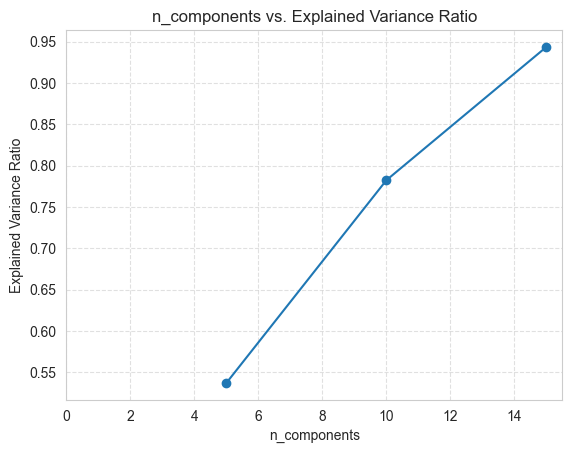

In [264]:
# Number of PCA's and variance captured
# data_scaled = StandardScaler().fit_transform(data_numeric)
data_scaled = data_normalized
variance_ratios = []
numbers = range(5, len(data_numeric.columns), 5)
for number in numbers:
    pca_ = PCA(n_components=number)
    pca_.fit_transform(data_scaled)
    variance_ratios.append(np.sum(pca_.explained_variance_ratio_))
    print(f"Number of components\t{number}\tTotal variance\t{sum(pca_.explained_variance_ratio_)}")

plot_PCA_variance(numbers=numbers, ratios=variance_ratios)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [20] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [16] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [20] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[16]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


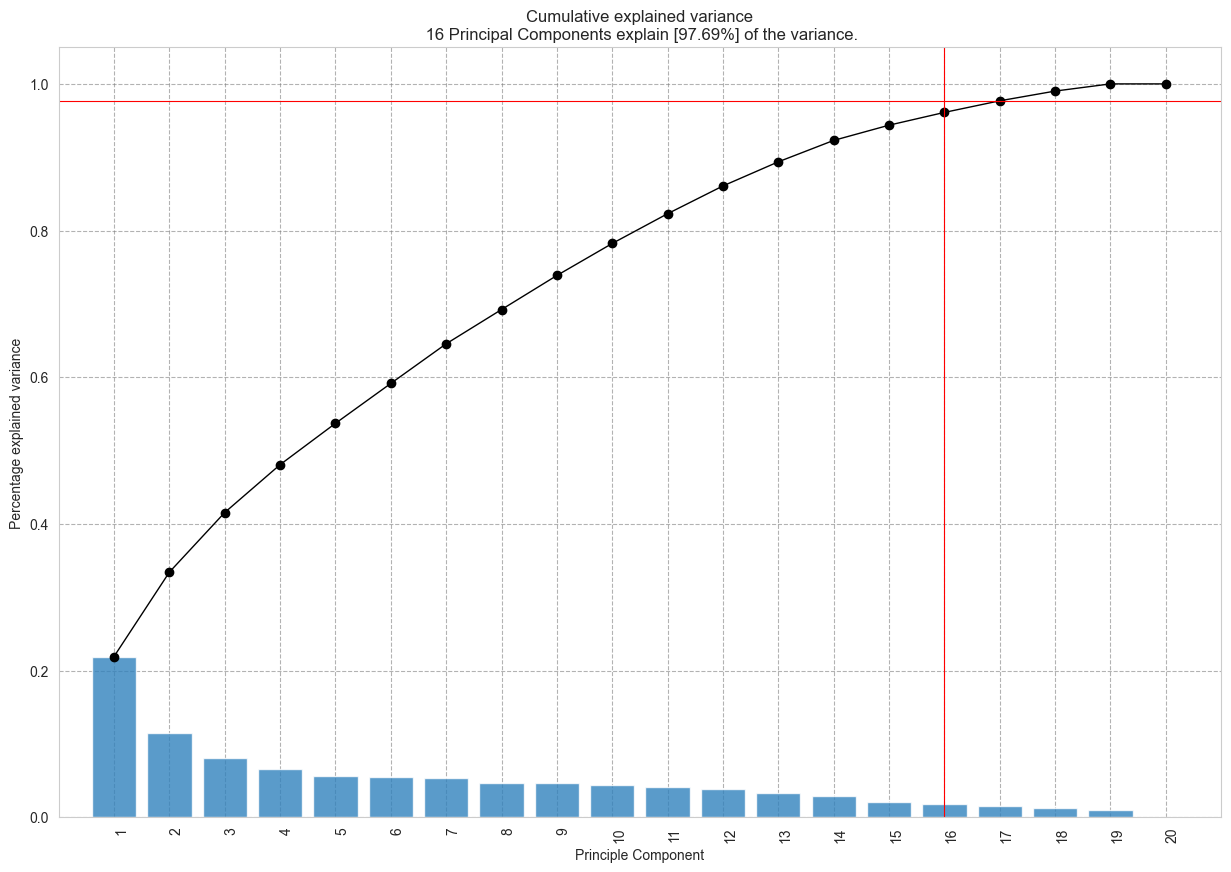

In [265]:
# PCA variance captured
import pca

model = pca.pca()
out = model.fit_transform(data_numeric)
model.plot()


plt.grid(linestyle="--", alpha=0.6, color="gray") 
plt.ylim(ymin=0)
plt.show()

C:\Users\mirto\AppData\Local\Temp\ipykernel_5600\3068480873.py:100: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in common_legend.legendHandles:


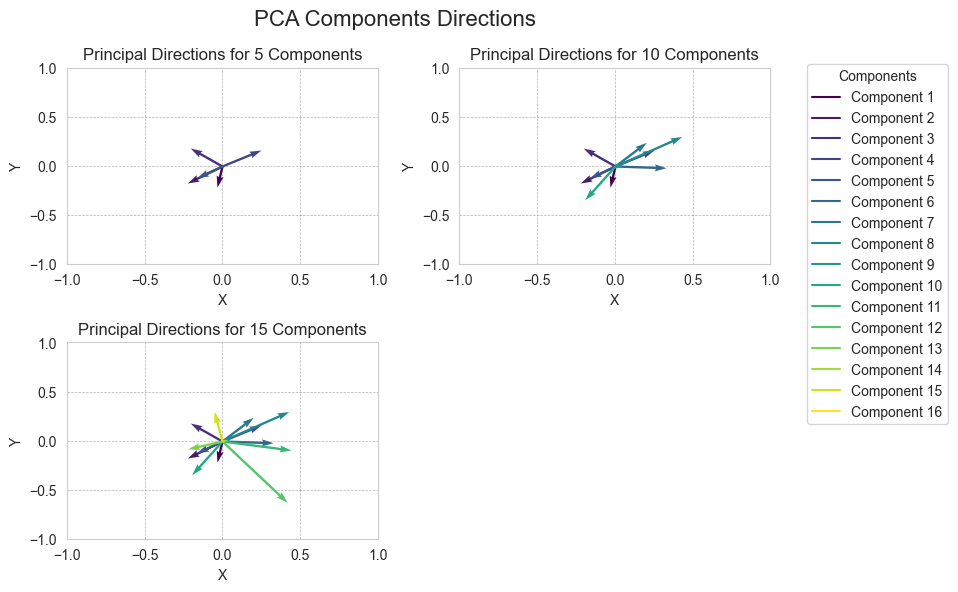

In [266]:
# PCA directions
plot_PCA_directions(data_numeric=data_numeric, numbers=numbers)

In [ ]:
# PCA variance ratios
explained_variance_ratios = pca_.explained_variance_ratio_
most_informative_pca = explained_variance_ratios.argmax()

# Print explained variance ratios for all PCs
for i, explained_variance_ratio in enumerate(explained_variance_ratios):
    print(f"PC_{i}: {explained_variance_ratio:.4f}")

print(f"The most informative PCA is PCA_{most_informative_pca} with an explained variance ratio of {explained_variance_ratios[most_informative_pca - 1]:.4f}")

PC_0: 0.1529
PC_1: 0.0881
PC_2: 0.0660
PC_3: 0.0588
PC_4: 0.0470
PC_5: 0.0446
PC_6: 0.0440
PC_7: 0.0426
PC_8: 0.0407
PC_9: 0.0403
The most informative PCA is PCA_0 with an explained variance ratio of 0.0403


In [ ]:
# Interpret PCA_0
factor_loadings_pc1 = pca_.components_[0]
feature_names = data_numeric.columns
feature_loadings = dict(zip(feature_names, factor_loadings_pc1))
sorted_features = sorted(feature_loadings.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the features with the highest absolute factor loadings for PC1
print("Features contributing most to PC0:")
for feature, loading in sorted_features:
    print(f"{feature}: {loading:.4f}")

Features contributing most to PC0:
in_shazam_charts: 0.4330
in_deezer_playlists: 0.4330
in_spotify_playlists: 0.4212
in_apple_playlists: 0.4027
streams: 0.3859
in_apple_charts: 0.2077
released_year: -0.1965
in_deezer_charts: 0.1260
in_spotify_charts: 0.1073
acousticness: -0.0926
energy: 0.0796
speechiness: -0.0567
released_month: -0.0547
valence: 0.0487
key_Unavailable: 0.0320
released_day: 0.0297
liveness: -0.0172
instrumentalness: -0.0155
key_G#: -0.0153
bpm: 0.0149
artist_count: 0.0139
key_D: -0.0124
key_F: 0.0122
mode_Minor: -0.0117
mode_Major: 0.0117
key_C#: -0.0115
key_G: -0.0060
danceability: 0.0032
key_F#: 0.0006
key_A#: 0.0000
key_D#: 0.0000
key_A: 0.0000
key_B: 0.0000
key_E: 0.0000


In [ ]:
# 10 components cover almost 80% variance
number = 10
pca_ = PCA(n_components=number)
pca_.fit(data_scaled)
data_pca = pca_.transform(data_scaled)
data_pca = pd.DataFrame(data_pca, columns=["PCA_" + str(i) for i in range(number)])

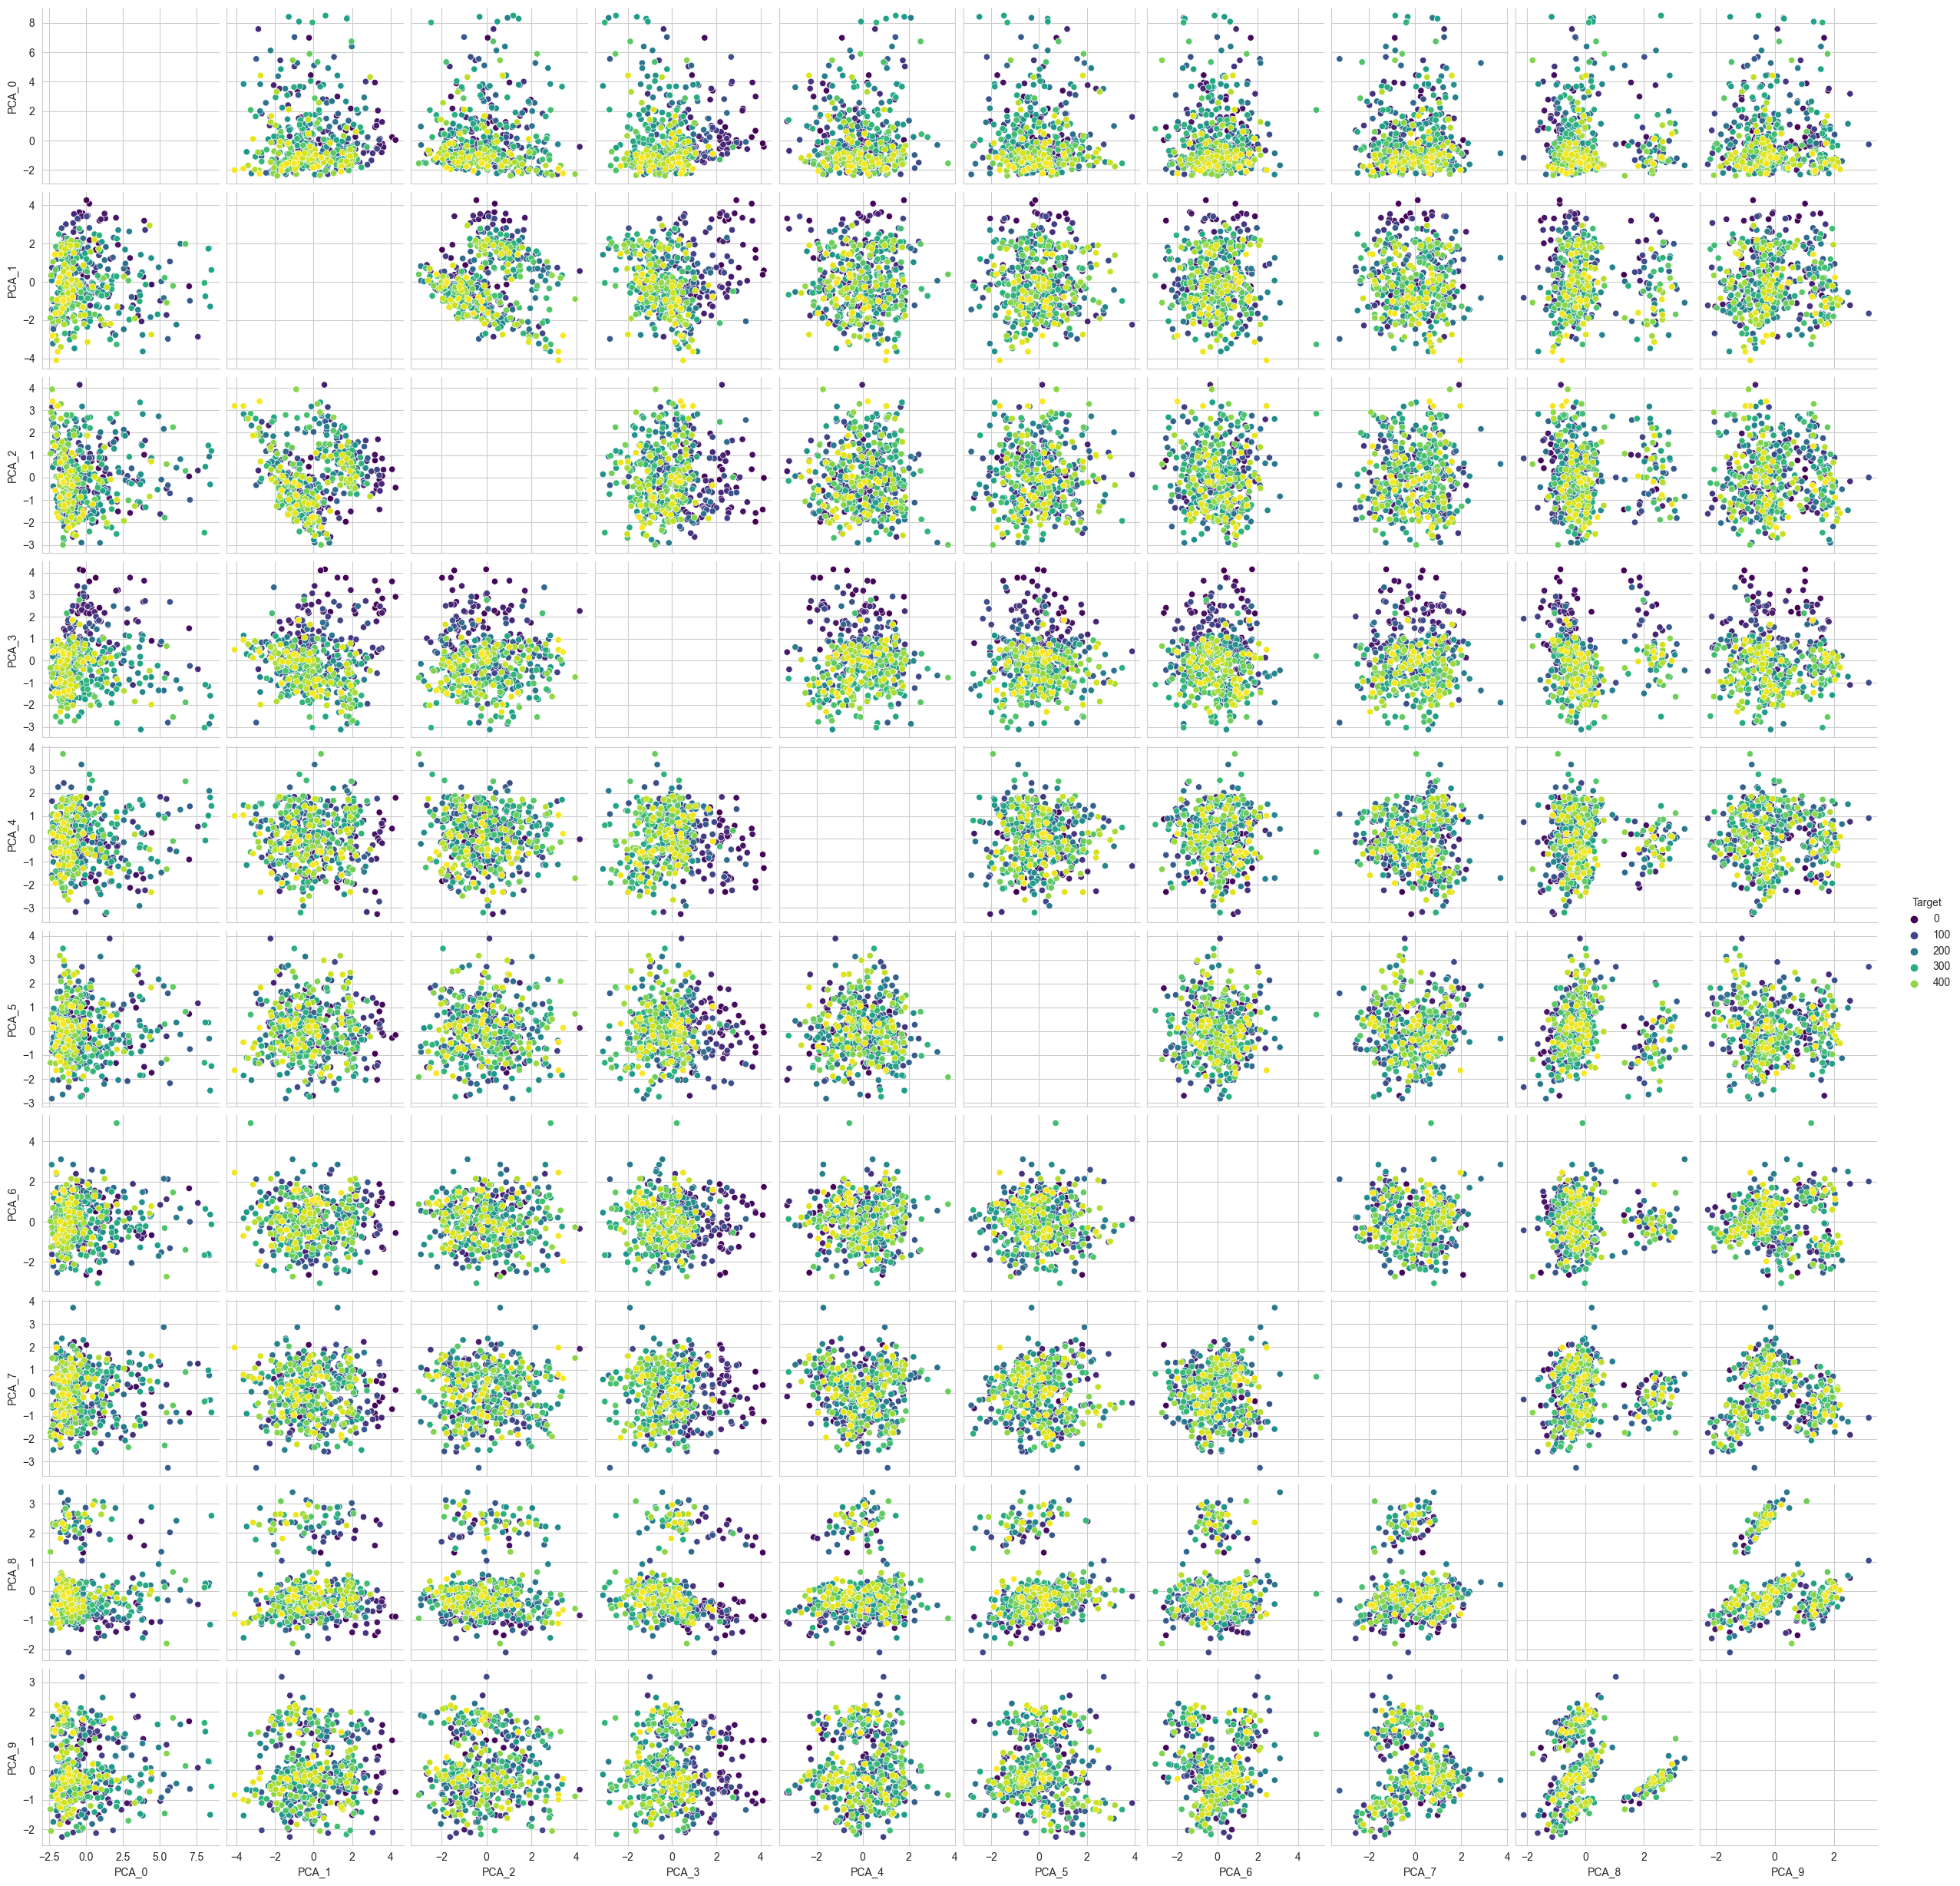

In [ ]:
# Pairplotting PCAs 
number = len(data_pca)
targets = list(range(number))
colors = plt.cm.viridis(np.linspace(0, 1, number))
data_pca["Target"] = targets

sns.set_style("whitegrid")
sns.pairplot(data_pca, hue="Target", palette="viridis")
plt.show()

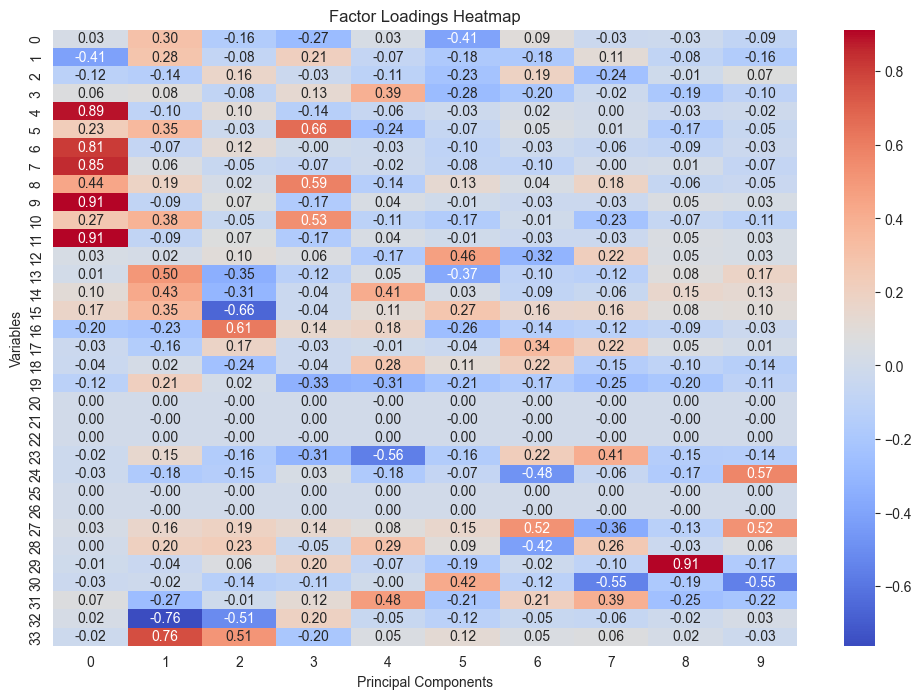

In [ ]:
# Correlation between PCAs
plt.figure(figsize=(12, 8))
factor_loadings = pca_.components_.T * np.sqrt(pca_.explained_variance_)
sns.heatmap(factor_loadings, cmap='coolwarm', annot=True, fmt='.2f')
plt.xlabel("Principal Components")
plt.ylabel("Variables")
plt.title("Factor Loadings Heatmap")
plt.show()

In [ ]:
from scipy.stats import kstest
from scipy.stats import lognorm
from scipy.stats import shapiro

In [ ]:
# Same code as above, but it also prints the latex tables

numeric_columns = data.select_dtypes(include=["number"])

alpha = 0.05

columns = []
ks_results = []
shapiro_results = []
lognorm_results = []

numeric_columns = data.select_dtypes(include=["number"])

for column in numeric_columns.columns:
    data_column = numeric_columns[column]

    ks_statistic, ks_p_value = kstest(data_column, "norm")
    
    shapiro_statistic, shapiro_p_value = shapiro(data_column)
    
    lognorm_params = lognorm.fit(data_column)
    lognorm_statistic, lognorm_p_value = kstest(data_column, "lognorm", lognorm_params)
    
    columns.append(column)
    ks_results.append(ks_p_value > alpha)
    shapiro_results.append(shapiro_p_value > alpha)
    lognorm_results.append(lognorm_p_value > alpha)

results_df = pd.DataFrame({
    "Attribute": columns,
    "Kolmogorov-Smirnov Test (Normal)": ks_results,
    "Shapiro-Wilk Test (Normal)": shapiro_results,
    "Log-Normality Test": lognorm_results
})

results_df["Kolmogorov-Smirnov Test (Normal)"] = results_df["Kolmogorov-Smirnov Test (Normal)"].map({True: "Yes", False: "No"})
results_df["Shapiro-Wilk Test (Normal)"] = results_df["Shapiro-Wilk Test (Normal)"].map({True: "Yes", False: "No"})
results_df["Log-Normality Test"] = results_df["Log-Normality Test"].map({True: "Yes", False: "No"})

latex_table = results_df.to_latex(index=False)
print(latex_table)

C:\Users\mirto\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
c:\Users\mirto\miniconda3\envs\mlshit\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


\begin{tabular}{llll}
\toprule
Attribute & Kolmogorov-Smirnov Test (Normal) & Shapiro-Wilk Test (Normal) & Log-Normality Test \\
\midrule
artist_count & No & No & No \\
released_year & No & No & No \\
released_month & No & No & No \\
released_day & No & No & No \\
in_spotify_playlists & No & No & Yes \\
in_spotify_charts & No & No & No \\
streams & No & No & Yes \\
in_apple_playlists & No & No & No \\
in_apple_charts & No & No & No \\
in_deezer_playlists & No & No & No \\
in_deezer_charts & No & No & No \\
in_shazam_charts & No & No & No \\
bpm & No & No & No \\
danceability & No & No & No \\
valence & No & No & No \\
energy & No & No & No \\
acousticness & No & No & No \\
instrumentalness & No & No & No \\
liveness & No & No & No \\
speechiness & No & No & No \\
\bottomrule
\end{tabular}

